In [4]:
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 7.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 3s 0us/step


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [7]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 128)               3276928   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4557057 (17.38 MB)
Trainable params: 4557057 (17.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 11s 52ms/step - loss: 0.4330 - accuracy: 0.7764 - val_loss: 0.3176 - val_accuracy: 0.8634
Epoch 2/5
196/196 [==============================] - 9s 47ms/step - loss: 0.0877 - accuracy: 0.9703 - val_loss: 0.3844 - val_accuracy: 0.8502
Epoch 3/5
196/196 [==============================] - 16s 81ms/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.4607 - val_accuracy: 0.8588
Epoch 4/5
196/196 [==============================] - 21s 108ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4938 - val_accuracy: 0.8606
Epoch 5/5
196/196 [==============================] - 20s 104ms/step - loss: 4.0732e-04 - accuracy: 1.0000 - val_loss: 0.5119 - val_accuracy: 0.8609


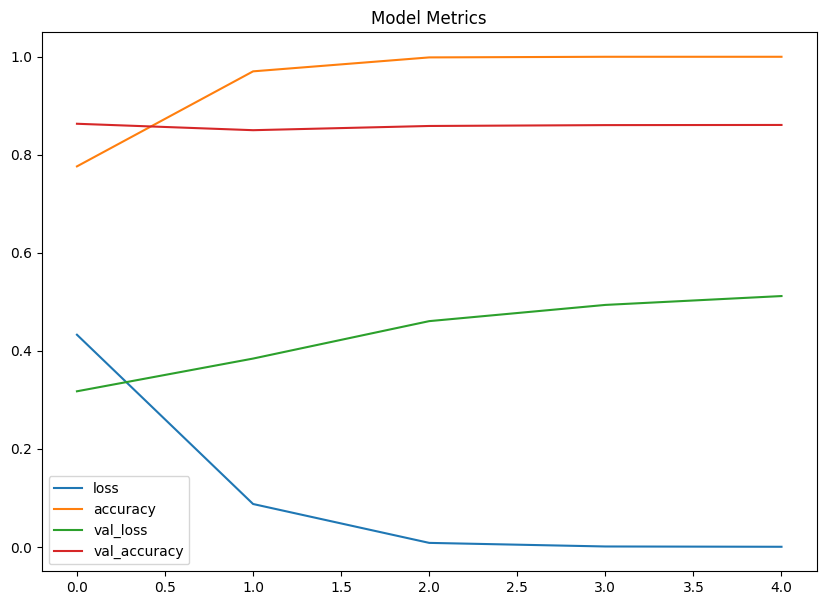

In [13]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model Metrics")
plt.show()

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.5119 - accuracy: 0.8609
Test Accuracy: 0.8609200119972229


In [15]:
y_pred = model.predict(x_test)

782/782 [==============================] - 4s 5ms/step


In [16]:
y_pred

array([[3.4665558e-04],
       [9.9999934e-01],
       [8.5077053e-01],
       ...,
       [1.7420048e-02],
       [1.7210878e-03],
       [9.6586055e-01]], dtype=float32)

In [17]:
y_pred = y_pred.flatten()

In [18]:
y_pred

array([3.4665558e-04, 9.9999934e-01, 8.5077053e-01, ..., 1.7420048e-02,
       1.7210878e-03, 9.6586055e-01], dtype=float32)

In [19]:
y_pred = (y_pred > 0.5).astype(int)

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12500
           1       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



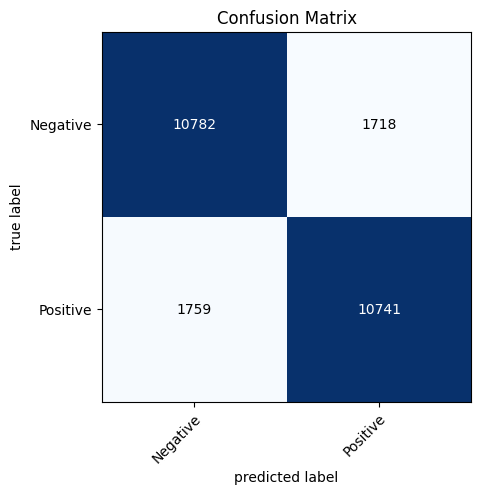

In [21]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()